ImportError: cannot import name 'runtime_version' from 'google.protobuf' (C:\Users\paras\anaconda3\Lib\site-packages\google\protobuf\__init__.py)

In [4]:
pip install --upgrade tensorflow


   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/332.0 MB 5.6 MB/s eta 0:00:59
   ---------------------------------------- 1.3/332.0 MB 5.5 MB/s eta 0:01:01
   ---------------------------------------- 2.1/332.0 MB 3.6 MB/s eta 0:01:32
   ---------------------------------------- 3.4/332.0 MB 4.6 MB/s eta 0:01:12
    --------------------------------------- 5.0/332.0 MB 5.3 MB/s eta 0:01:03
    --------------------------------------- 5.8/332.0 MB 5.0 MB/s eta 0:01:06
    --------------------------------------- 6.8/332.0 MB 4.9 MB/s eta 0:01:06
   - -------------------------------------- 8.4/332.0 MB 5.3 MB/s eta 0:01:02
   - -------------------------------------- 9.2/332.0 MB 5.5 MB/s eta 0:00:59
   - -------------------------------------- 10.0/332.0 MB 5.2 MB/s eta 0:01:02
   - -------------------------------------- 11.5/332.0 MB 5.2 MB/s eta 0:01:02
   - -------------------------------------- 13.4/332.0 MB 5.6 MB/s et

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\paras\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\lite\\python\\_pywrap_converter_api.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop 
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [4]:
img = image.load_img(r"C:\Users\paras\OneDrive\Desktop\computer -vision\basedata\training\Gir\Gir_42.jpg")

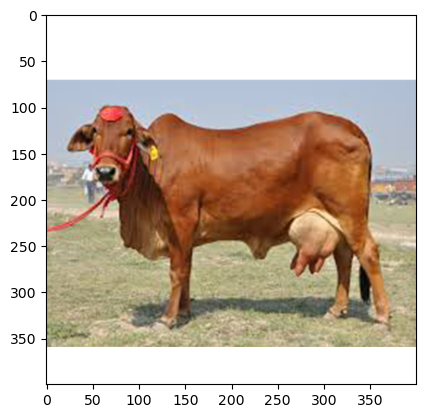

In [5]:
plt.imshow(img)

In [6]:
cv2.imread(r"C:\Users\paras\OneDrive\Desktop\computer -vision\basedata\training\Gir\Gir_42.jpg").shape

(400, 400, 3)

In [7]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)


In [8]:
train_dataset = train.flow_from_directory(r"C:\Users\paras\OneDrive\Desktop\computer -vision\basedata\training",
                                          target_size =(200,200),
                                          batch_size = 30,
                                          class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(r"C:\Users\paras\OneDrive\Desktop\computer -vision\basedata\validation",
                                          target_size =(200,200),
                                          batch_size = 30,
                                          class_mode = 'categorical')

Found 5211 images belonging to 35 classes.
Found 5211 images belonging to 35 classes.


In [15]:
train_dataset.class_indices

{'Amritmahal': 0,
 'Ayrshire': 1,
 'Banni': 2,
 'Bargur': 3,
 'Bhadawari': 4,
 'Brown_Swiss': 5,
 'Dangi': 6,
 'Deoni': 7,
 'Gir': 8,
 'Guernsey': 9,
 'Hallikar': 10,
 'Hariana': 11,
 'Holstein_Friesian': 12,
 'Jaffrabadi': 13,
 'Jersey': 14,
 'Kangayam': 15,
 'Kankrej': 16,
 'Kasargod': 17,
 'Kenkatha': 18,
 'Kherigarh': 19,
 'Khillari': 20,
 'Krishna_Valley': 21,
 'Malnad_gidda': 22,
 'Mehsana': 23,
 'Murrah': 24,
 'Nagori': 25,
 'Nagpuri': 26,
 'Nili_Ravi': 27,
 'Nimari': 28,
 'Ongole': 29,
 'Pulikulam': 30,
 'Rathi': 31,
 'Red_Dane': 32,
 'Red_Sindhi': 33,
 'Sahiwal': 34}

In [16]:
train_dataset.classes

array([ 0,  0,  0, ..., 34, 34, 34], dtype=int32)

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),

    tf.keras.layers.Dense(35, activation="softmax")   # ✅ Changed from 3 → 35
])


C:\Users\paras\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    loss="categorical_crossentropy",    
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=["accuracy"]
)

In [11]:
model_fit = model.fit(
    train_dataset,
    steps_per_epoch=len(train_dataset),
    epochs=30,
    validation_data=validation_dataset,
    validation_steps=len(validation_dataset)

)

C:\Users\paras\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 91/174 ━━━━━━━━━━━━━━━━━━━━ 1:37 1s/step - accuracy: 0.1006 - loss: 3.4478

C:\Users\paras\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


174/174 ━━━━━━━━━━━━━━━━━━━━ 417s 2s/step - accuracy: 0.1564 - loss: 3.1360 - val_accuracy: 0.2556 - val_loss: 2.6858
Epoch 2/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 398s 2s/step - accuracy: 0.2650 - loss: 2.5902 - val_accuracy: 0.4331 - val_loss: 2.0027
Epoch 3/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.4130 - loss: 2.0100 - val_accuracy: 0.6822 - val_loss: 1.2714
Epoch 4/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.6325 - loss: 1.2593 - val_accuracy: 0.7789 - val_loss: 0.7794
Epoch 5/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.8137 - loss: 0.7330 - val_accuracy: 0.9179 - val_loss: 0.3914
Epoch 6/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.9004 - loss: 0.4810 - val_accuracy: 0.9438 - val_loss: 0.2833
Epoch 7/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.9198 - loss: 0.3858 - val_accuracy: 0.9524 - val_loss: 0.2568
Epoch 8/30
174/174 ━━━━━━━━━━━━━━━━━━━━ 395s 2s/step - accuracy: 0.9271 - loss: 0.3386 - val_accuracy: 0.952

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


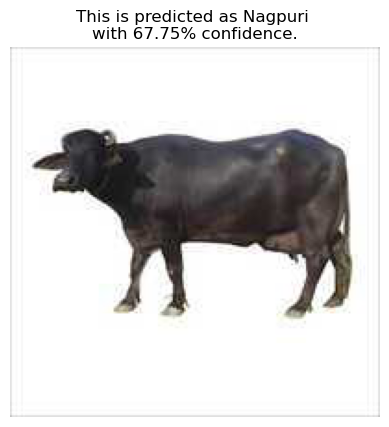

In [15]:
img_path = r"C:\Users\paras\OneDrive\Desktop\computer -vision\basedata\testing\Surti_17.jpg"

class_names = [
    "Amritmahal", "Ayrshire", "Banni", "Bargur", "Bhadawari", "Brown_Swiss",
    "Dangi", "Deoni", "Gir", "Guernsey", "Hallikar", "Hariana", "Holstein_Friesian",
    "Jaffrabadi", "Jersey", "Kangayam", "Kankrej", "Kasargod", "Kenkatha", "Kherigarh",
    "Khillari", "Krishna_Valley", "Malnad_gidda", "Mehsana", "Murrah", "Nagori",
    "Nagpuri", "Nili_Ravi", "Nimari", "Ongole", "Pulikulam", "Rathi",
    "Red_Dane", "Red_Sindhi", "Sahiwal"
]

img = image.load_img(img_path, target_size=(200, 200))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0) / 255.0

pred = model.predict(X)
pred_class = np.argmax(pred, axis=1)[0]
confidence = np.max(pred) * 100

plt.imshow(img)
plt.axis("off")

if confidence < 60:  
    plt.title("Not a valid animal type", fontsize=12, color="red")
else:
    plt.title(f"This is predicted as {class_names[pred_class]} \nwith {confidence:.2f}% confidence.", fontsize=12)

plt.show()


In [ ]:
git init
